# PCA y TSN-E

Los objetivos de este fichero son:
- Hacerse una idea de como se agrupan las diferentes clases
- Realizar un PCA para ver cada componente cuanta varianza puede explicar cada componente
- Ver como afectan diferentes tecnicas de balanceamiento de datos

Se muestran las últimas técnicas de balanceamiento probadas pero se han probado más como SMOTE Tomek...

Aunque se pueden observar algunos patrones, no hay ningún patrón claro que permita distinguir las clases, tal y como se puede ver también en el notebook exploratoryVariables, las clases se superponen bastante

### Imports

In [4]:
import pandas as pd

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys; sys.path.insert(0, '..')
import lib

### Read data

In [10]:
X, y = lib.readHDF('../../Data/raw/hdf5/data.hdf5')
X.drop(['ID','X','Y'], axis=1, inplace=True)
X.head()
X = lib.buildingFloorToNumeric(X)
X = lib.cadastralQualityToNumeric(X)
y = lib.yToNumeric(y)

In [11]:
y_labels = y.unique().tolist()

### Unbalanced

1    90173
2     4490
3     2976
4     2093
5     1828
6     1332
7      338
Name: CLASE, dtype: int64


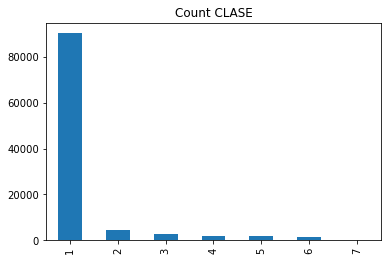

In [12]:
classes_count = y.value_counts()
print(classes_count)
classes_count.plot(kind='bar', title='Count CLASE');

Explained variation per principal component: [0.78214451 0.10922789 0.03647742]


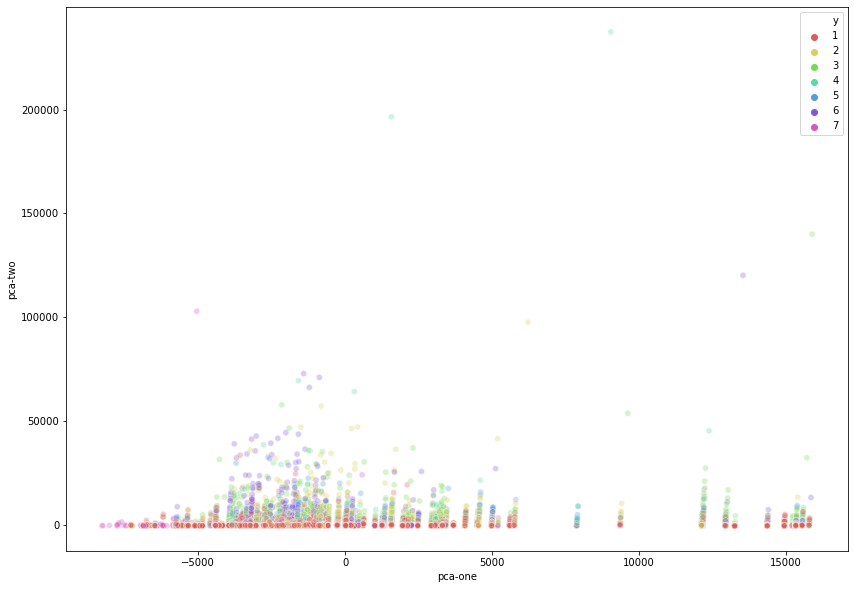

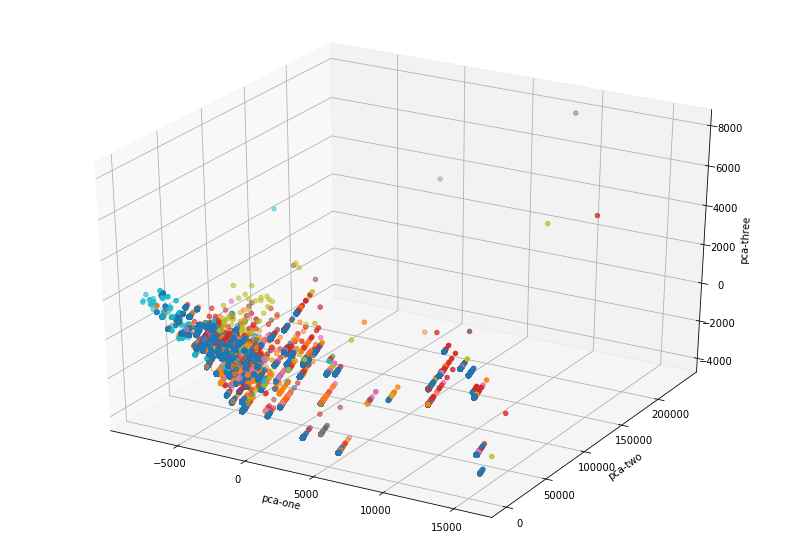

Perplexity =  40


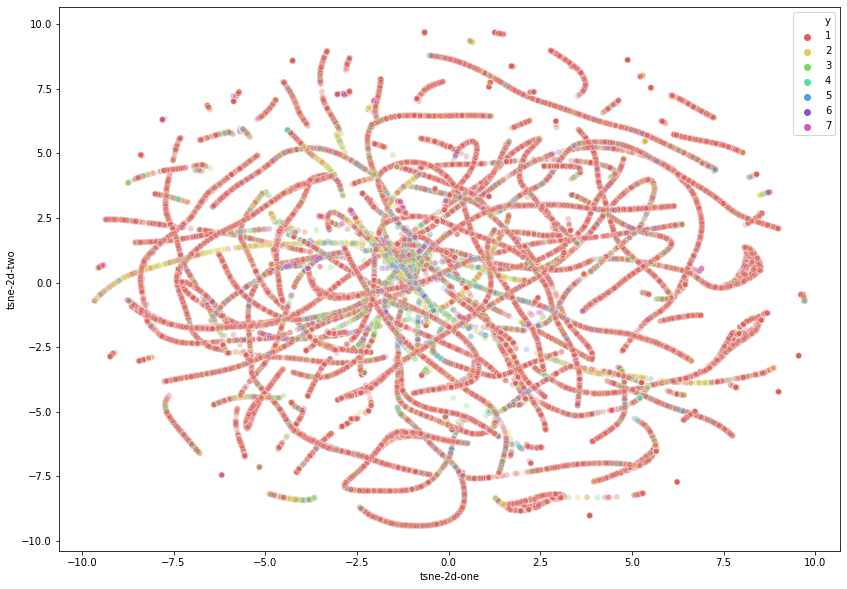

In [13]:
lib.pca_tsne(X,y, perplexity=[40])

In [1]:
'''ratio_classes={
            1: classes_count[1],
            2: classes_count[2]*3,
            3: int(classes_count[3]*3.5),
            4: classes_count[4]*4,
            5: classes_count[5]*4,
            6: int(classes_count[6]*4.5),
            7: classes_count[7]*6
        }
        '''

'ratio_classes={\n            1: classes_count[1],\n            2: classes_count[2]*3,\n            3: int(classes_count[3]*3.5),\n            4: classes_count[4]*4,\n            5: classes_count[5]*4,\n            6: int(classes_count[6]*4.5),\n            7: classes_count[7]*6\n        }\n        '

### Balanced with SMOTE

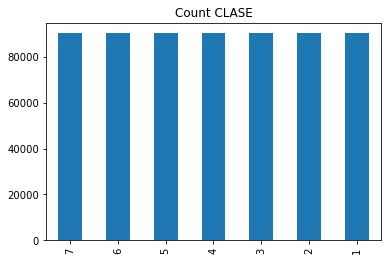

In [16]:
smote = SMOTE(random_state=0,n_jobs=12)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts().plot(kind='bar', title='Count CLASE')

Explained variation per principal component: [0.52630978 0.42075114 0.02620741]


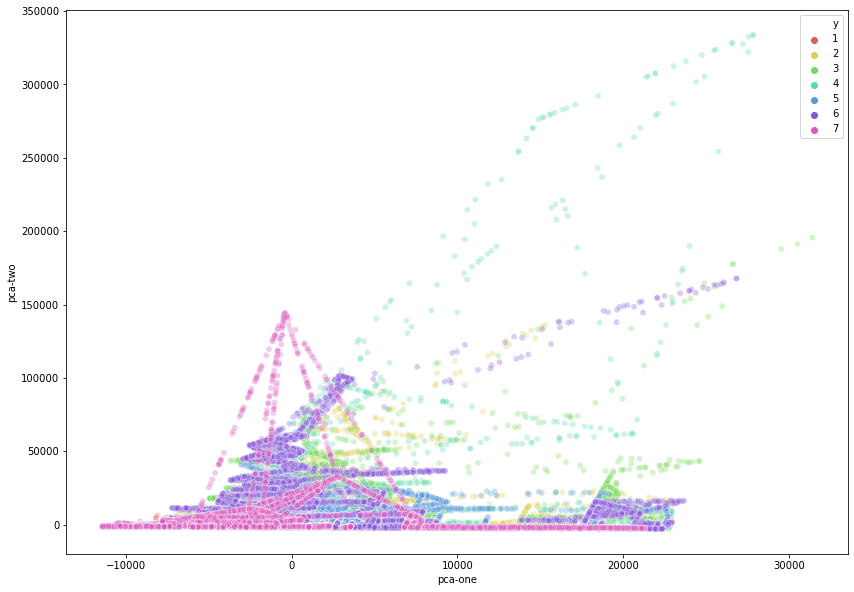

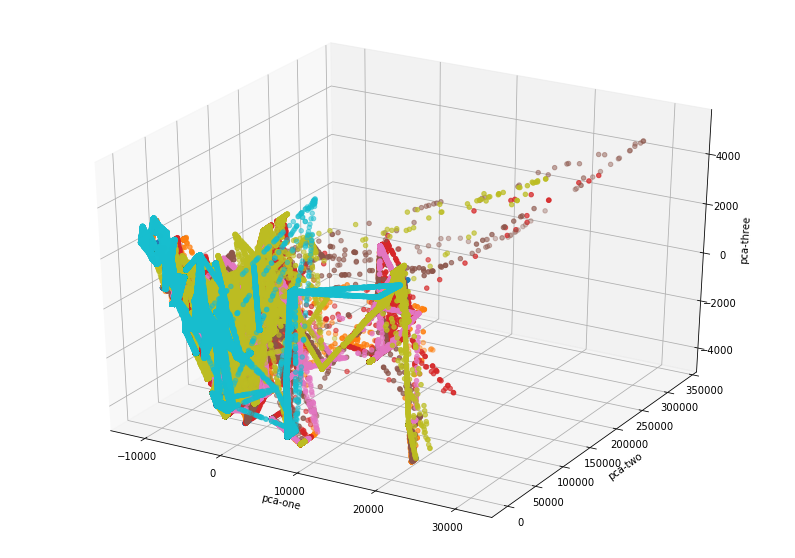

Perplexity =  40


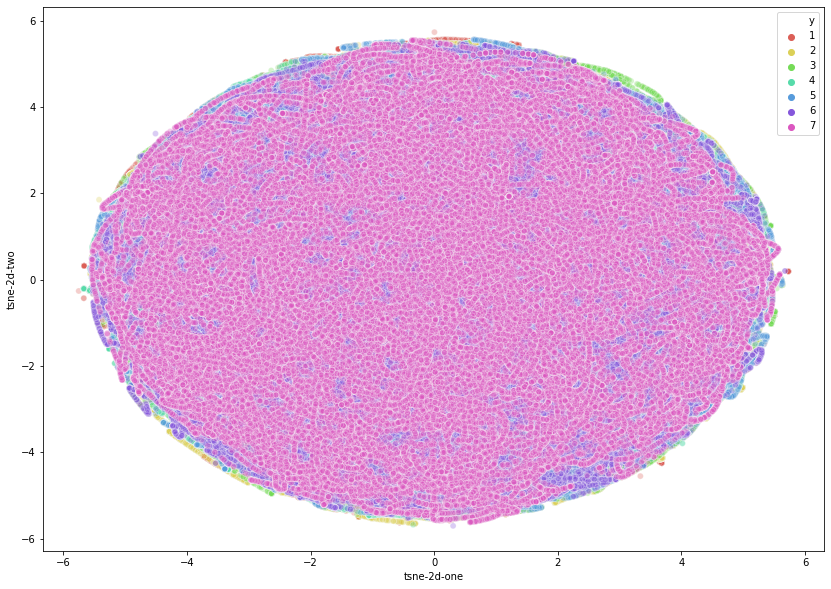

In [17]:
lib.pca_tsne(X_resampled,y_resampled, perplexity=[40])

### Balanced with SMOTEENN

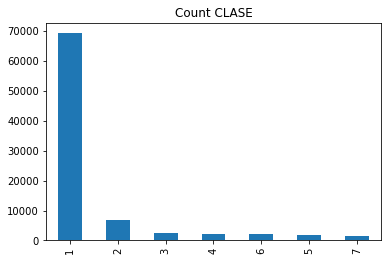

In [24]:
smote_enn = SMOTEENN(random_state=0,n_jobs=12,sampling_strategy=ratio_classes)
X_resampled_smoteenn, y_resampled_smoteenn = smote_enn.fit_resample(X, y)
y_resampled_smoteenn.value_counts().plot(kind='bar', title='Count CLASE')

Explained variation per principal component: [0.72097496 0.18159044 0.06263579]


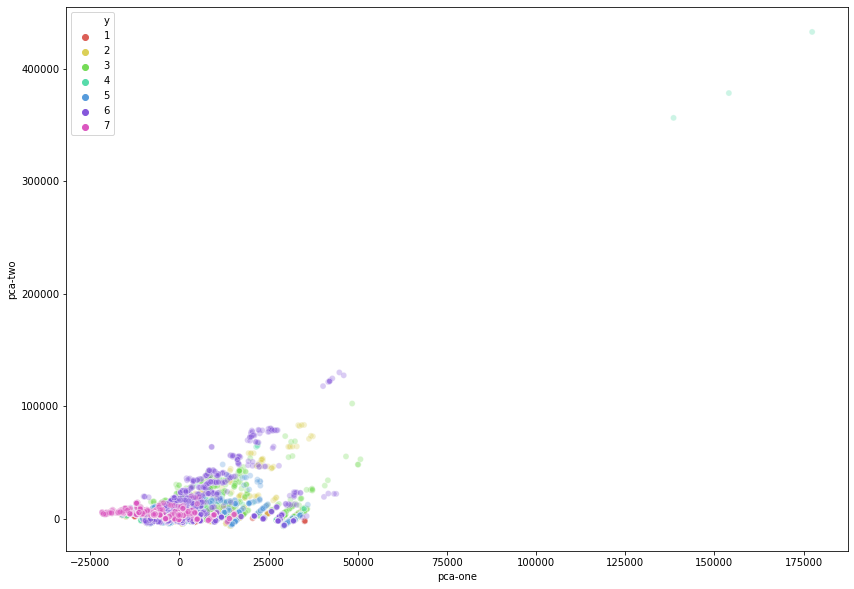

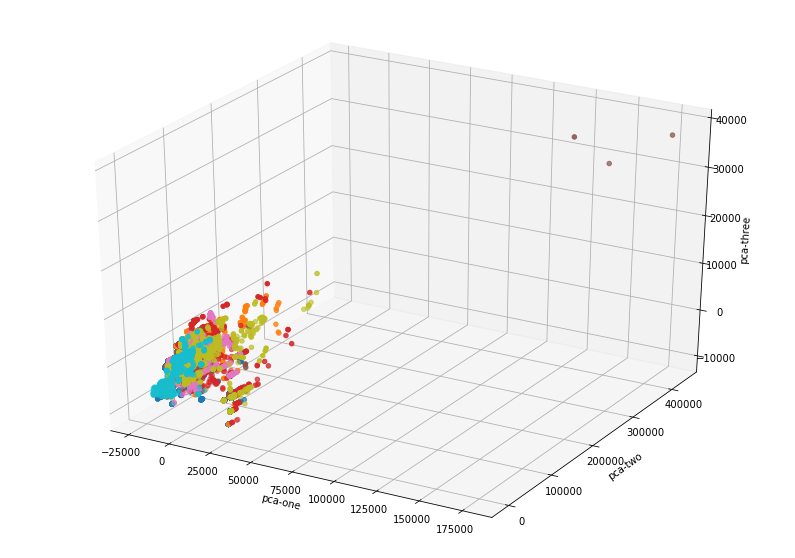

Perplexity =  10


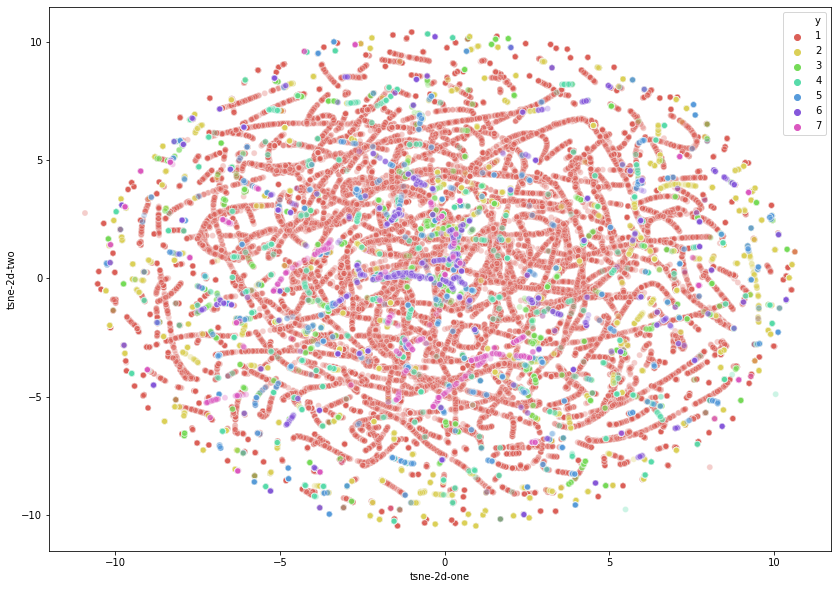

In [25]:
lib.pca_tsne(X_resampled_smoteenn,y_resampled_smoteenn, perplexity=[10])

### Store balanced data

In [31]:
lib.storeHDF('../../Data/balanced/SMOTEENN/data.hdf5',X_train=X_resampled_smoteenn,y_train=y_resampled_smoteenn)

In [32]:
lib.storeHDF('../../Data/balanced/SMOTETomek/data.hdf5',X_train=X_resampled_smotetomek,y_train=y_resampled_smotetomek)